# **Predicting heart disease using machine learning.**

This notebook explores the application of various Python-oriented machine learning and data science libraries with the objective of constructing a predictive model. This model aims to determine the likelihood of an individual having heart disease, utilizing their medical characteristics as input parameters.

Approach: 
>1. Problem definition.
>2. Data.
>3. Evaluation.
>4. Features.
>5. Modelling.
>6. Experimentation.

## 1. Problem definition.

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

> This is a classification problem.
## 2. Data.

The original data came from the Cleaveland dataset from the UCI machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation.

>85% accuracy achieved during proof of concept will prompt us to pursue the project.

## 4. Features.

This is where you'll get different information about each of the features in the data. You can do this through doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset such as your employer or client).


**Create a data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
   
3. cp - chest pain type
    > - 0: Typical angina: chest pain related to decrease in blood supply to the heart
    > - 1: Atypical angina: chest painnot related to the heart.
    > - 2: Non-anginal pain: typically esophagea; spasms(non heart related)
    > - 3: Asymptomatic: chest pain not showing signs of disease.
   
4. trestbps - resting blood pressure (in mmhg on admission to the hospital). Anything above 130-140 is typically cause for concern.
5. chol - serum cholestrol in mg/dl
    > - serum = LDL + HDL + .2*triglycerides
    > - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    > - '126' mg/dl signals diabetes
7. restecg - resting electrocardiographic results
    > - 0: Nothing to note
    > - 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    > - 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved.
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest. Looks at stress of heart during exercise. Unhealthy heart will stress more.
11. slope - the slope of the peak exercise ST segment
    > - 0: Upsloping: better heart rate with exercise (uncommon)
    > - 1: Flatsloping: minimal change (typical healthy heart
    > - 2: Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0 - 3) colored by flourosopy
    > - colored vessel means the doctor can see the blood passing through
    > - the more blood movement the better (no clots)

13. tha13 = thalium stress result
    > - 1,3: normal
    > - 6: fixed defect: used to be defect but ok now
    > - 7: reversible defect: no proper blood movement when exercising.
14. target - have disease or not(1 = yes, 0 = no), (The predicted attribute).

## Preparing the tools

We're going to use Pandas, Matplotlib, NumPy for data analysis and manipulation, and Scikit-Learn to build our model.

In [2]:
# Import all the tools that you need

# Regular EDA ( Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#Import warnings library
import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows,columns)

(303, 14)

## Data Exploration ( Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there are
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

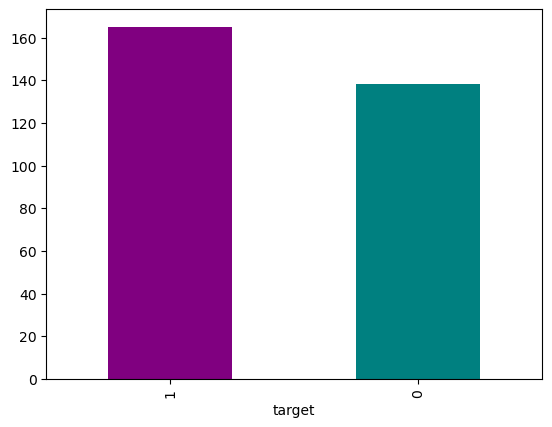

In [7]:
df.target.value_counts().plot(kind='bar', color = ['purple', 'teal']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


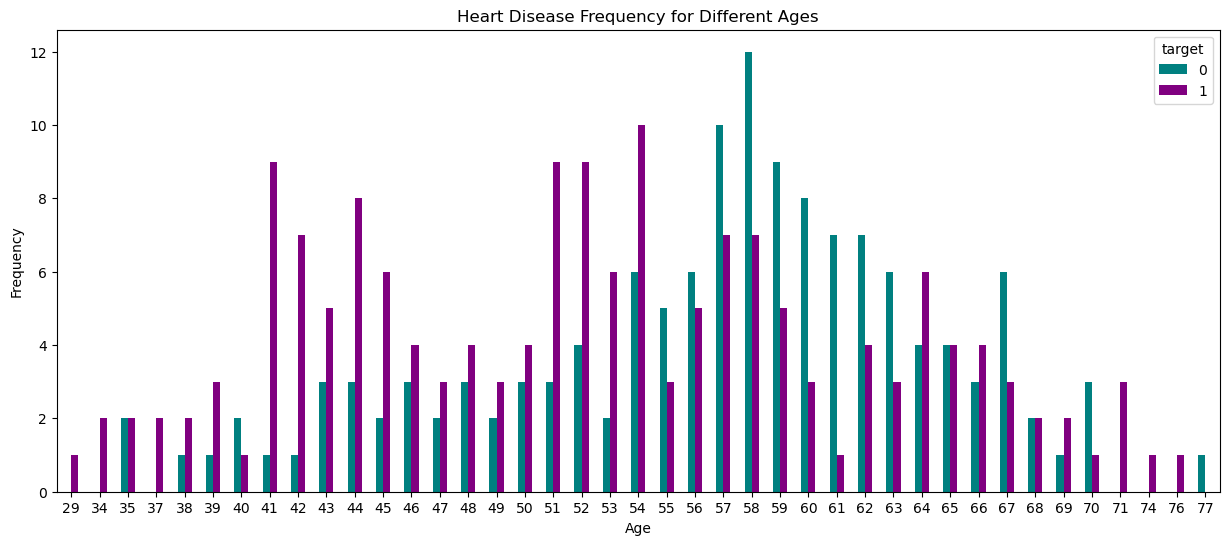

In [11]:
# Analysis of the age distribution of people having heart disease
pd.crosstab(df.age, df.target).plot(kind='bar', figsize = (15,6), color = ['teal','purple'])
plt.title('Heart Disease Frequency for Different Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show();

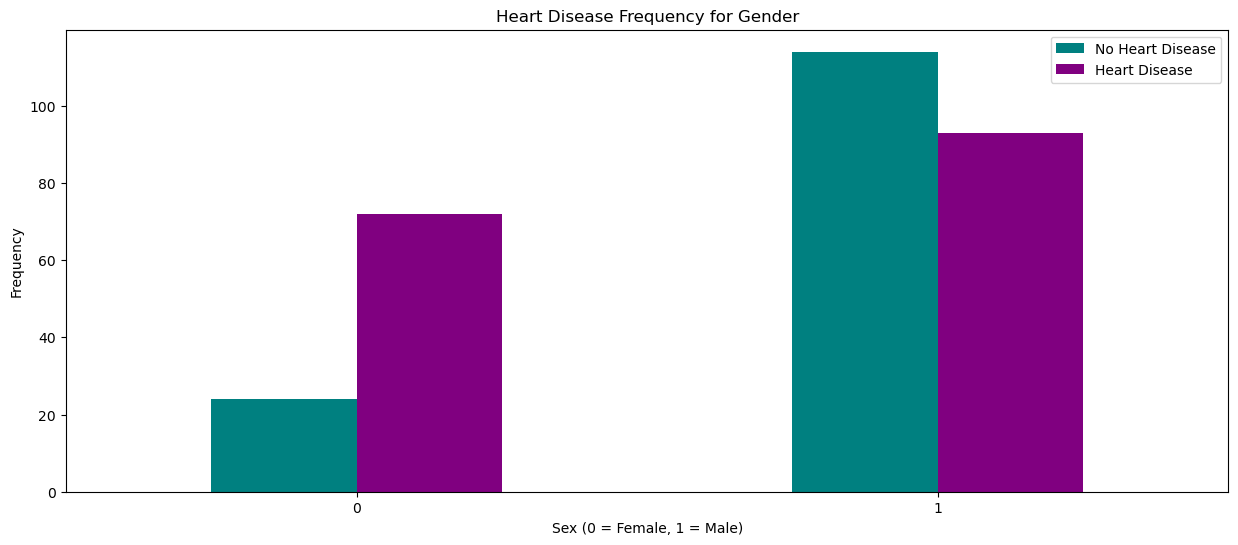

In [12]:
#Now we analyze gender distribution of people having a heart problem.
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['teal','purple'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

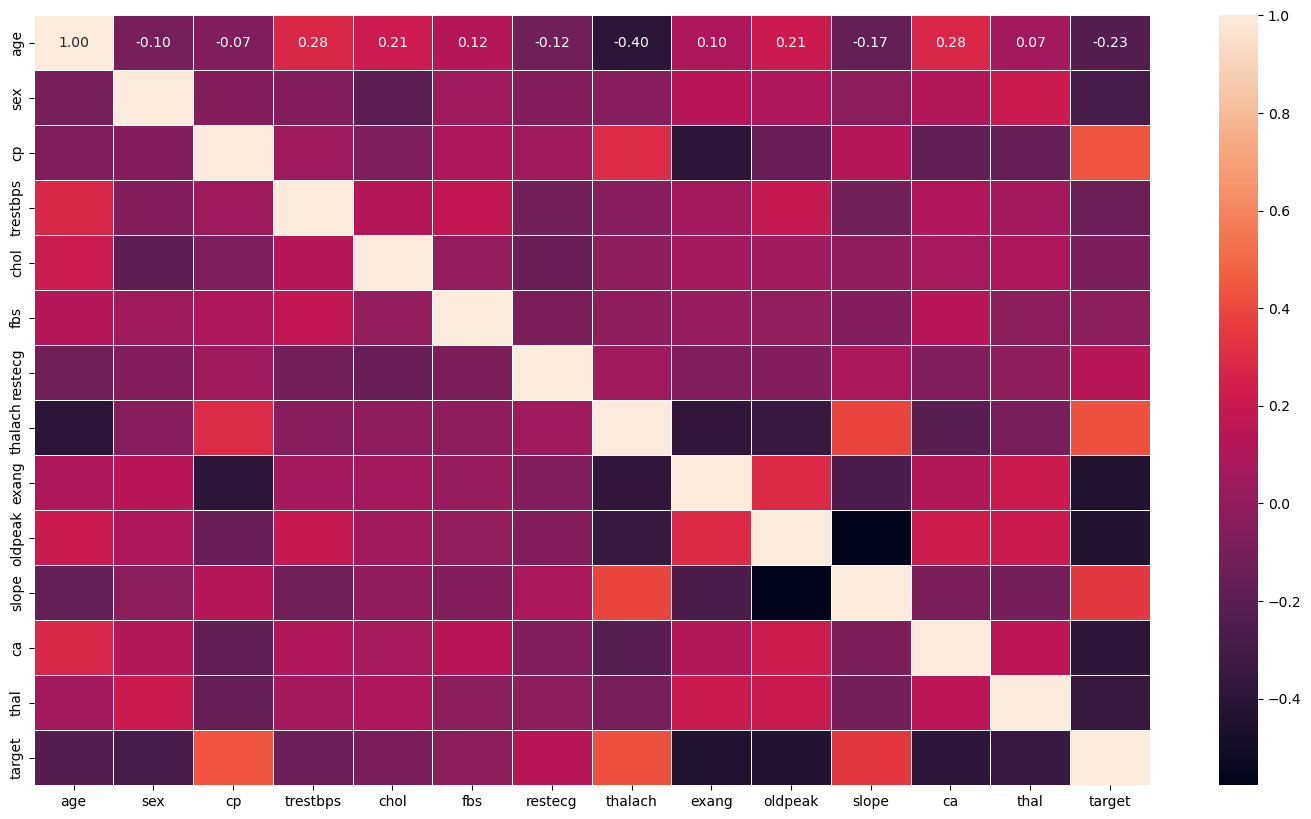

In [13]:
# Checking relationship between the independent and dependent variables for further analysis
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, linewidths = 0.5, fmt = '.2f')
plt.show()

## Age vs Max Heart Rate for Heart Disease

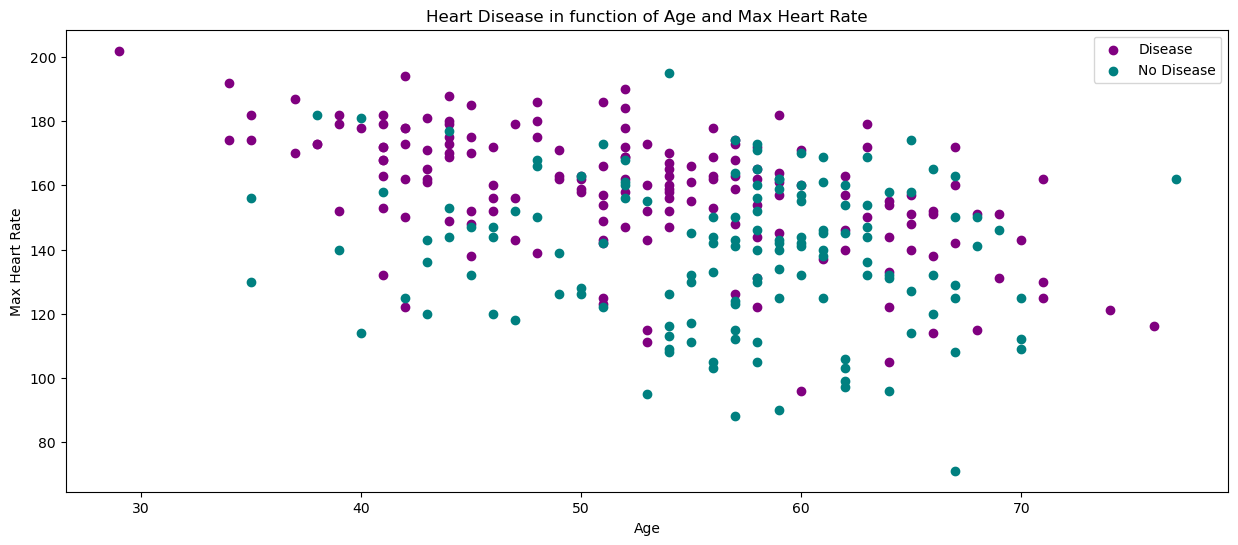

In [14]:
# Create another figure
plt.figure(figsize=(15,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c='purple')

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c='teal')

# Add some helpful information
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

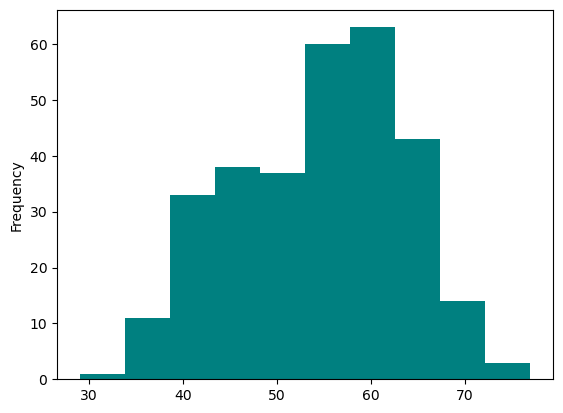

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(color='teal');

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type
> - 0: Typical angina: chest pain related to decrease in blood supply to the heart
> - 1: Atypical angina: chest painnot related to the heart.
> - 2: Non-anginal pain: typically esophagea; spasms(non heart related)
> - 3: Asymptomatic: chest pain not showing signs of disease.

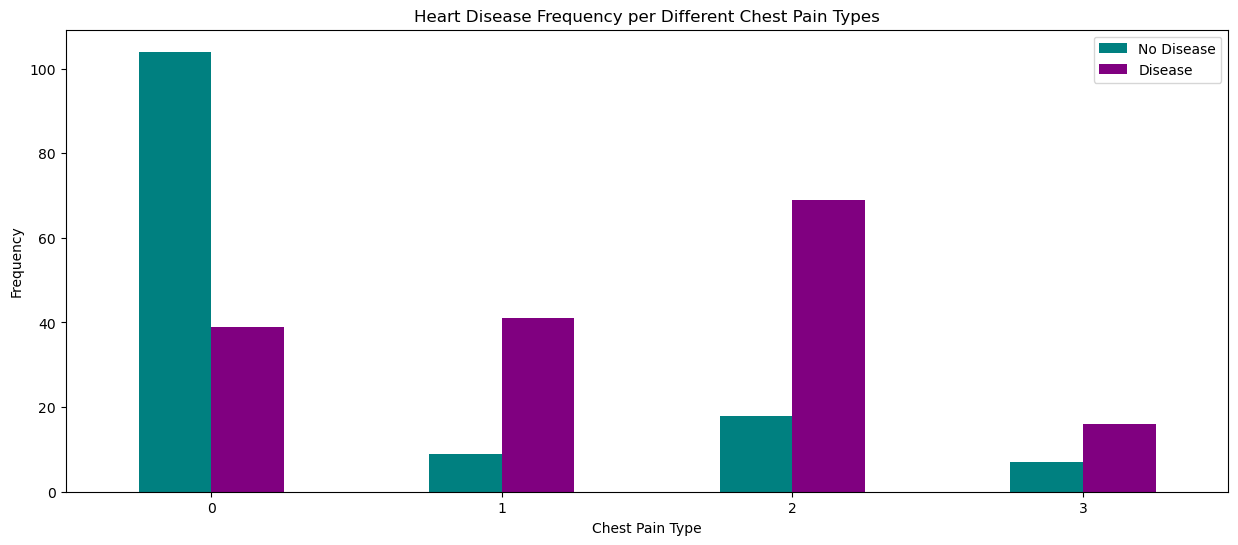

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize = (15,6), color = ['teal','purple'])
plt.title('Heart Disease Frequency per Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [17]:
# Split the data into X and y
X = df.drop('target', axis = 1)

y = df['target']

In [18]:
# Split the data into train and test set
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train,  y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2)

## Building the machine learning model.

We're going to try 3 different models:

1. Logistic Regression.
2. K-Nearest Neighbours Classifier.
3. Random Forest Classifier.

In [19]:
# Put models in a dictionary

models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

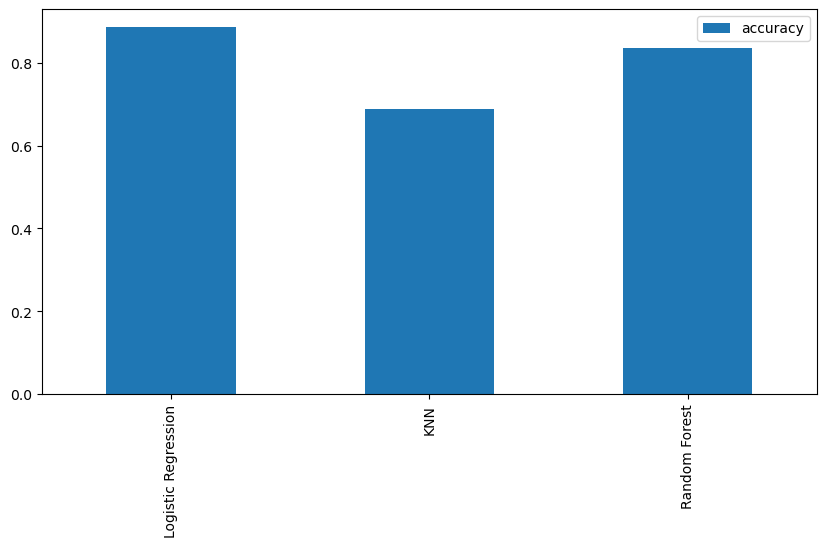

In [21]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(figsize=(10,5));

Next steps:
* Hyperparameter tuning.
* Feature importance.
* Confusion matrix.
* Cross-validation.
* Precision.
* Recall.
* F1 Score.
* Classification Report.
* ROC curve.
* Area under the curve (AUC)

### Hyperparameter Tuning (By hand).

In [22]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


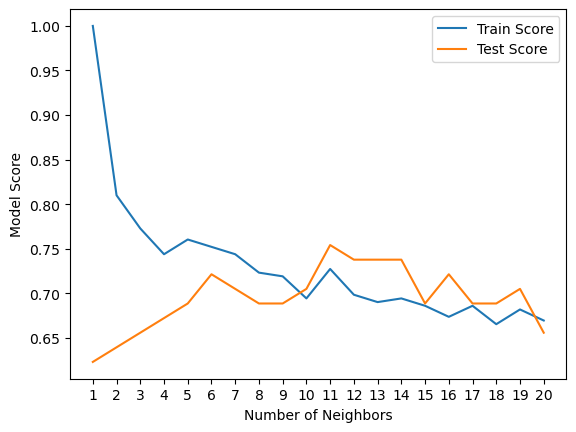

In [23]:
# Visualizing the results
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter Tuning with RandomizedSearchCV.

We're going to tune:
* LogisticRegression(),
* RandomForestClassifier().
  ... using RandomizedSearchCV

#### Tuning LogisticRegression().

In [24]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparamter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [25]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20, 
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Tuning RandomForestClassifier()

In [28]:
# Setup random seed

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, 
                           cv=5, 
                           n_iter=20, 
                           verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
#finding the best parameters for hyperparameter tuning.
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV.

We're going to tune:
* LogisticRegression() using GridSearchCV to see whether we can improve the scores.

In [31]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparamter search for LogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=5, 
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy.

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisons and evauate our trained model, we first need to make predictions and it would be great to use cross-validation where possible.

In [34]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

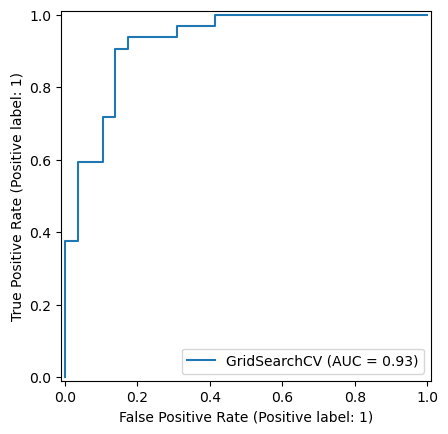

In [35]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [36]:
# Confusion matrix
y_true = y_test
y_preds = y_preds
print(confusion_matrix(y_true, y_preds))

[[25  4]
 [ 3 29]]


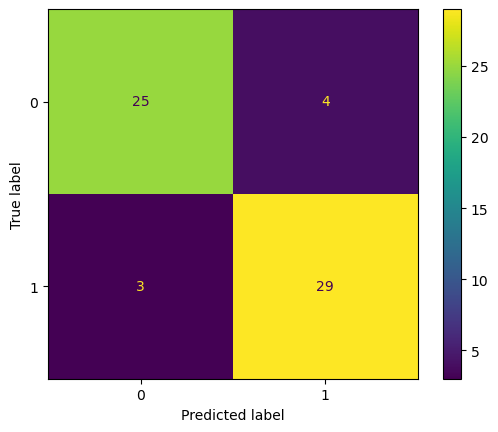

In [37]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_preds, labels=gs_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs_log_reg.classes_)
disp.plot()
plt.show()

## Get the Classification report, cross-validated Precision and F1-score.

In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

**We're going to calculate Accuracy, Precision, Recall and F1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.**

In [39]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
# Create a new classifier with the best parameters.
clf = LogisticRegression(C=0.20433597178569418,
                         solver = 'liblinear')

In [41]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [42]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [43]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [44]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

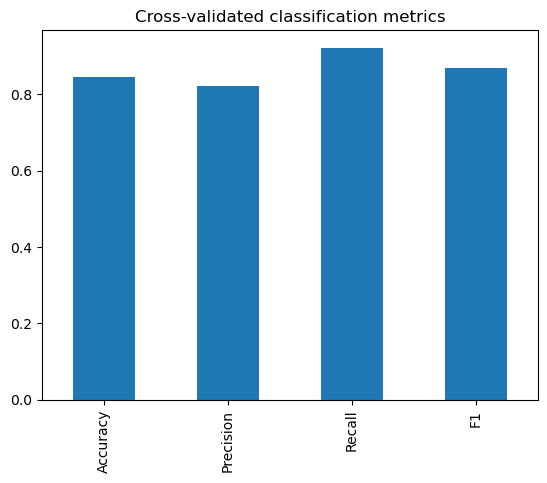

In [45]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                           'Precision': cv_precision, 
                           'Recall': cv_recall,
                           'F1': cv_f1}, 
                           index = [0])

cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics', 
                 legend = False);

### Feature Importance

This is determining which features contributed most to the outcome of the model and how they contributed.

Finding the feature importance is different for each machine learning model. One way to find feature importance is to search for '(MODEL NAME) feature importance'.

Finding feature importance for our LogisticRegression model...

In [46]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver = 'liblinear')
clf.fit(X_train, y_train);

In [47]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [48]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

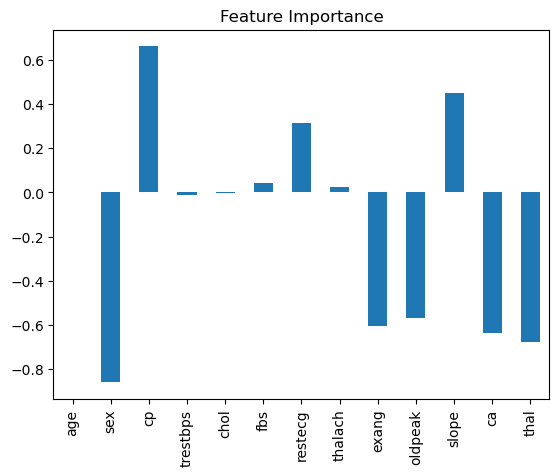

In [49]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);